### Notes from "Reinforcement Learning" by Sutton amd Barto

The most important feature distinguishing reinforcement learning from other types of learning is that it uses training information that **evaluates** the actions taken rather than **instructs** by giving correct actions.

- **Purely evaluative feedback** indicates how good the action taken was, but not whether it was the best or the worst action possible. Depends entirely on the action taken.
- **Purely instructive feedback**, on the other hand, indicates the correct action to take, independently of the action actually taken (basis of supervised learning). Independent of the action taken.


**Nonassociative settings** --> evaluative feedback problem that we explore is a simple version of the k-armed bandit problem (actions taken in one situation).

**Associative settings** --> actions are taken in more than one situation.

----------------
### A k-armed Bandit Problem

- In the k-armed bandit problem, we have a decision-maker or **agent**, who chooses between k different **actions**, and receives a **reward** based on the action he chooses.
- You are faced repeatedly with a choice among $k$ different options, or actions.
- After each choice you receive a numerical reward chosen from a stationary probability distribution that depends on the action you selected.
- Your objective is to maximize the expected total reward over some time period, for example, over 1000 action selections, or time steps.

Each of the $k$ actions has an expected or mean reward given that that action is selected; let us call this the **value of that action**. 

We denote the action selected on time step $t$ as $A_{t}$, and the corresponding reward as $R_{t}$. The value then of an arbitrary action $a$, denoted $q_{*}(a)$, is the **expected reward** given that $a$ is selected:

$q_{*}(a) \doteq E[R_{t} | A_{t}=a]$

The goal of the agent is to maximize **expected reward** (argmax).

We denote the estimated value of action $a$ at time step $t$ as $Q_{t}(a)$. We would like Qt(a) to be close to $q_{t}(a)$.

- If you maintain estimates of the action values, then at any time step there is at least one action whose estimated value is greatest. --? We call these the **greedy** actions. 
- When you select one of these actions, we say that you are **exploiting** your current knowledge of the values of the actions. 
- If instead you select one of the nongreedy actions, then we say you are **exploring**, because this enables you to improve your estimate of the nongreedy action’s value.

****

### Action-value Methods

**True value** of an action is the mean reward when that action is selected.

$Q_{t} \doteq \frac{\text{sum of rewards when $a$ taken prior to $t$}} {\text{number of times $a$ taken prior to $t$}} = \frac{\sum_{i=1}^{t-a}R_{i} . I_{A_{i}=a}}{\sum_{i=1}^{t-a}I_{A_{i}=a}}$

where $I_{predicate}$ denotes the random variable that is 1 if predicate is true and 0 if it is not. If the denominator is zero, then we instead define $Q_{t}(a)$ as some default value, such as 0. 

As the denominator goes to infinity, by the law of large numbers, $Q_{t}(a)$ converges to $q_{*}(a)$. We call this the **sample-average method** for estimating action values because each estimate is an average of the sample of relevant rewards. 

The simplest action selection rule is to select one of the actions with the highest
estimated value, that is, one of the greedy actions as defined in the previous section. If there is more than one *greedy* action, then a selection is made among them in some arbitrary way, perhaps randomly. We write this greedy action selection method as

$A_{t} \doteq \text{argmax } Q_{t}(a)$

where $argmax_{a}$ denotes the action a for which the expression that follows is maximized (again, with ties broken arbitrarily). 

Greedy action selection always **exploits** current knowledge to maximize immediate reward; it spends no time at all sampling apparently inferior actions to see if they might really be better.

**$\epsilon-greedy$** methods - a simple alternative is to behave greedily most of the time, but every once in a while, say with small probability $\epsilon$, instead select randomly from among all the actions with equal probability, independently of the action-value estimates.

- An advantage of these methods is that, in the limit as the number of steps increases, every action will be sampled an infinite number of times, thus ensuring that all the $Q_{t}(a)$ converge to $q_{*}(a)$. This

### Incremental Implementation

$Q_{n}\doteq \frac{R_{1} + R_{2} + ... + R_{{n-1}}}{n-1}$

- The obvious implementation would be to maintain a record of all the rewards and then perform this computation whenever the estimated value was needed. 
- However, if this is done, then the memory and computational requirements would grow over time as more rewards are seen. 
- Each additional reward would require additional memory to store it and additional computation to compute the sum in the numerator.
- It is easy to devise incremental
formulas for updating averages with small, constant computation required to process each new reward:

$Q_{n+1} = \frac{1}{n} \sum^{n}_{i=1}R_{i}$

This implementation requires memory only for $Q_{n}$ and $n$, and only the small computation for each new reward. This update rule is of a form that occurs frequently throughout this book. The general form is:

$NewEstimate \leftarrow OldEstimate + StepSize[Target - OldEstimate]$

- The expression $[Target-OldEstimate]$ is an $error$ in the estimate. It is reduced by taking a step toward the “Target.” The target is presumed to indicate a desirable direction in which to move, though it may be noisy. In the case above, for example, the target is the $n$-th reward.
- Note that the step-size parameter (StepSize) used in the incremental method (2.3) changes from time step to time step. In processing the $n$-th reward for action $a$, the method uses the step-size parameter
$\frac{1}{n}$ . In this book we denote the step-size parameter by $\alpha$ or, more generally, by $\alpha_{t}(a)$.

**Pseudocode**

#### Initialize
from a = 1:k:
    Q(a) <- 0
    N(a) <- 0

#### Loop forever:

A \leftarrow { argmax_{a} Q(a) with probability 1-\epsilon (breaking ties randomly)

a random action with probability $\epsilon$

$R \leftarrow bandit(A)$
$N(A) \leftarrow N(A) + 1$
$Q(A) \leftarrow Q(A) + \frac{1}{N(A)}[R - Q(A)]$ 

The function bandit(a) is assumed to take an action and return a corresponding reward.


The idea of this **upper confidence bound (UCB)** action selection is that the square-root term is a measure of the uncertainty or variance in the estimate of $a$’s value.


Dealing with exploitation-exploration dillema:
- optimistic initial values encourage early exploration
- upper-confidence bound action selection uses uncertainty in the value estimates to balance exploration and exploitation.

### Gradient Bandit Algorithms

Another way:
**Numerical preference** for each action $a$, denoted as $Ht(a)$. 
- The larger the preference, the more often that action is taken, but the preference has no interpretation in terms of reward. 
- Only the relative preference of one action over another is important; if we add 1000 to all the action preferences there is no e↵ect on the action probabilities, which are determined according to a **soft-max** distribution (i.e., Gibbs or Boltzmann distribution) as follows:

$Pr{A_{t}=a} \doteq \frac{e^{H_{t}(a)}}{\sum^{k}_{b=1}e^{H_{t}(b)}} \doteq \pi_{t}(a)$

where here we have also introduced a useful new notation, $\pi_{t}(a)$, for the probability of taking action $a$ at time $t$. Initially all action preferences are the same (e.g., H1(a) = 0, for all a) so that all actions have an equal probability of being selected.


### Associative Search (Contextual Bandits)
- in a general reinforcement learning task there is more than one situation, and the goal is to learn a policy: a mapping from situations to the actions that are best in those situations.
- As an example, suppose there are several di↵erent k-armed bandit tasks, and that on each step you confront one of these chosen at random. Thus, the bandit task changes randomly from step to step. This would appear to you as a single, nonstationary k-armed bandit task whose true action values change randomly from step to step. You could try using one of the methods described in this chapter that can handle nonstationarity, but unless the true action values change slowly, these methods will not work very well.
- Now suppose, however, that when a bandit task is selected for you, you are given some distinctive clue about its identity (but not its action values).
- Now you can learn a policy associating each task, signaled by the color you see, with the best action to take when facing that task—for instance, if red, select arm 1; if green, select arm 2. With the right policy you can usually do much better than you could in the absence of any information distinguishing one bandit task from another.
- **associative search task** - involves both trial-and-error learning to search for the best actions, and association of these actions with the situations in which they are best. Associative search tasks are often now called contextual bandits in the literature. Associative search tasks are intermediate between the k-armed bandit problem and the full reinforcement learning problem. They are like the full reinforcement learning problem in that they involve learning a policy, but like our version of the k-armed bandit problem in that each action affects only the immediate reward. If actions are allowed to a↵ect the next situation as well as the reward, then we have the full reinforcement learning problem.

### Summary

Our graphs so far have shown the course of learning over time for each algorithm and parameter setting, to produce a **learning curve** for that algorithm and parameter setting. If we plotted learning curves for all algorithms and all parameter settings, then the graph would be too complex and crowded to make clear comparisons. Instead we summarize a complete learning curve by its average value over the 1000 steps; this value is proportional to the area under the learning curve. Figure 2.6 shows this measure for the various bandit algorithms from this chapter, each as a function of its own parameter shown on a single scale on the x-axis. This kind of graph is called a **parameter study**. 

## Exercise

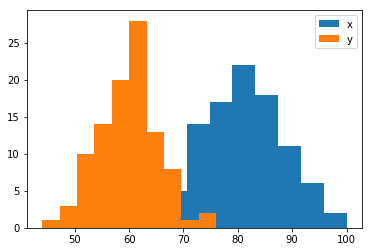

In [28]:
import numpy as np
import matplotlib.pyplot as plt

size = 100

x = np.array(np.random.binomial(200, 0.4, size))
y = np.array(np.random.binomial(200, 0.3, size))
plt.hist(x)
plt.hist(y)
plt.legend(['x', 'y'])

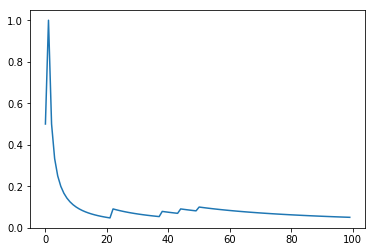

In [235]:
Q = np.zeros(size)
Q[0] = 0.5    
options = [x[0], y[0]]
base = np.random.choice(options)
winner = np.max(options)
output = [1 if base == winner else 0][0]


for i in range(1,size):
      
    Q[i] = Q[i-1]+(1/i*(output - Q[i-1]))
    base = [x[i] if Q[i] < 0.5 else y[i]][0]
    winner = np.max(options)
    output = [1 if base == winner else 0][0]

plt.plot(Q)
                       

In [89]:
winner = np.max(options)
winner

76